<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import circuit
from importlib import reload
import functionalities
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Fixed parameters for the experiment**

In [2]:
N_bags=50
N_items=15
nb_periods=20
spec_param={'C':[1.,1.],'phi':[np.pi/8,np.pi/2],'em':[1,1],'omega':[5,5]}

**What we will vary during the experiment**

In [77]:
subsample = np.arange(1, 20)[::-1]
# subsample = [25,24,23,22,21,2018,15,10,5,2,1]

**To store the results**

In [78]:
df_RBF_m = pd.DataFrame(index=['mean_RBF_rmse'], columns=subsample)
df_RBF_std = pd.DataFrame(index=['std_RBF_rmse'], columns=subsample)
df_RBF_Sig_m = pd.DataFrame(index=['mean_Sig_rmse'], columns=subsample)
df_RBF_Sig_std = pd.DataFrame(index=['std_Sig_rmse'], columns=subsample)
df_Pathwise_Sig_m = pd.DataFrame(index=['mean_pathwise_Sig_rmse'], columns=subsample)
df_Pathwise_Sig_std = pd.DataFrame(index=['std_pathwise_Sig_rmse'], columns=subsample)

**Run the experiment**

In [79]:
reload(circuit)
reload(functionalities)

for j,param in enumerate(subsample):
    
    print(j)
        
    ''' GENERATE DATA '''
    t_span = np.linspace(0, nb_periods * 2 * np.pi / spec_param['omega'][0], nb_periods * 25)
    # this is what changes
    nb_obs = nb_periods * param
    # generate data
    example = circuit.Circuit(N_bags=N_bags, N_items=N_items, spec_param=spec_param,t_span=t_span,nb_obs=nb_obs)
    example.generate_data()
    example.get_phi()
    
    X = example.paths
    y = example.labels[:,0]
    
#     mean,std = functionalities.RBF_RBF_SVM(X=X, y=y)
#     df_RBF_m.iloc[0,j] = mean
#     df_RBF_std.iloc[0,j] = std
    
    mean,std  = functionalities.SigESig_LinReg(depth1 = 5,depth2 = 2,X = X, y = y, ll=False, at=False, ss=False)
    df_Pathwise_Sig_m.iloc[0,j] = mean
    df_Pathwise_Sig_std.iloc[0,j] = std   
    
    mean,std  = functionalities.ESig_SVM(depth = 5 ,X = X, y = y, ll=False, at=False, ss=True)

    df_RBF_Sig_m.iloc[0,j] = mean
    df_RBF_Sig_std.iloc[0,j] = std

  0%|          | 0/50 [00:00<?, ?it/s]

0


100%|██████████| 50/50 [00:04<00:00, 12.13it/s]


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    2.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.7s finished
100%|██████████| 50/50 [00:00<00:00, 309.52it/s]


Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.5s finished
  0%|          | 0/50 [00:00<?, ?it/s]

1


100%|██████████| 50/50 [00:03<00:00, 12.80it/s]


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    2.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.6s finished
100%|██████████| 50/50 [00:00<00:00, 257.73it/s]


Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.5s finished
  0%|          | 0/50 [00:00<?, ?it/s]

2


100%|██████████| 50/50 [00:03<00:00, 13.70it/s]


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    2.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.8s finished
100%|██████████| 50/50 [00:00<00:00, 339.27it/s]


Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.5s finished
  0%|          | 0/50 [00:00<?, ?it/s]

3


100%|██████████| 50/50 [00:03<00:00, 14.88it/s]

Fitting 3 folds for each of 32 candidates, totalling 96 fits



[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    1.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.4s finished
100%|██████████| 50/50 [00:00<00:00, 349.76it/s]


Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.5s finished
  0%|          | 0/50 [00:00<?, ?it/s]

4


100%|██████████| 50/50 [00:03<00:00, 14.49it/s]


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    1.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.3s finished
100%|██████████| 50/50 [00:00<00:00, 392.95it/s]

Fitting 3 folds for each of 180 candidates, totalling 540 fits



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.5s finished
  0%|          | 0/50 [00:00<?, ?it/s]

5


100%|██████████| 50/50 [00:02<00:00, 16.74it/s]


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    1.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.4s finished
100%|██████████| 50/50 [00:00<00:00, 411.96it/s]

Fitting 3 folds for each of 180 candidates, totalling 540 fits



[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.5s finished
  0%|          | 0/50 [00:00<?, ?it/s]

6


100%|██████████| 50/50 [00:02<00:00, 20.75it/s]


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    2.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.5s finished
100%|██████████| 50/50 [00:00<00:00, 452.80it/s]

Fitting 3 folds for each of 180 candidates, totalling 540 fits



[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.5s finished
  0%|          | 0/50 [00:00<?, ?it/s]

7


100%|██████████| 50/50 [00:02<00:00, 18.01it/s]

Fitting 3 folds for each of 32 candidates, totalling 96 fits



[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    2.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.6s finished
100%|██████████| 50/50 [00:00<00:00, 515.21it/s]

Fitting 3 folds for each of 180 candidates, totalling 540 fits



[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.6s finished
  0%|          | 0/50 [00:00<?, ?it/s]

8


100%|██████████| 50/50 [00:02<00:00, 19.44it/s]


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    2.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.9s finished
100%|██████████| 50/50 [00:00<00:00, 590.56it/s]

Fitting 3 folds for each of 180 candidates, totalling 540 fits



[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.5s finished
  0%|          | 0/50 [00:00<?, ?it/s]

9


100%|██████████| 50/50 [00:01<00:00, 25.57it/s]


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    2.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.8s finished
100%|██████████| 50/50 [00:00<00:00, 598.37it/s]

Fitting 3 folds for each of 180 candidates, totalling 540 fits



[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.5s finished
  0%|          | 0/50 [00:00<?, ?it/s]

10


100%|██████████| 50/50 [00:01<00:00, 25.17it/s]


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    2.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.6s finished
100%|██████████| 50/50 [00:00<00:00, 637.93it/s]

Fitting 3 folds for each of 180 candidates, totalling 540 fits



[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.6s finished
  0%|          | 0/50 [00:00<?, ?it/s]

11


100%|██████████| 50/50 [00:01<00:00, 26.82it/s]


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    2.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.9s finished
100%|██████████| 50/50 [00:00<00:00, 725.88it/s]

Fitting 3 folds for each of 180 candidates, totalling 540 fits



[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.6s finished
  0%|          | 0/50 [00:00<?, ?it/s]

12


100%|██████████| 50/50 [00:01<00:00, 31.44it/s]

Fitting 3 folds for each of 32 candidates, totalling 96 fits



[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    2.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.8s finished
100%|██████████| 50/50 [00:00<00:00, 937.78it/s]

Fitting 3 folds for each of 180 candidates, totalling 540 fits



[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.6s finished
  0%|          | 0/50 [00:00<?, ?it/s]

13


100%|██████████| 50/50 [00:01<00:00, 41.83it/s]

Fitting 3 folds for each of 32 candidates, totalling 96 fits



[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    1.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.3s finished
100%|██████████| 50/50 [00:00<00:00, 1057.31it/s]

Fitting 3 folds for each of 180 candidates, totalling 540 fits



[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.6s finished
  0%|          | 0/50 [00:00<?, ?it/s]

14


100%|██████████| 50/50 [00:01<00:00, 45.93it/s]

Fitting 3 folds for each of 32 candidates, totalling 96 fits



[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    1.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.4s finished
100%|██████████| 50/50 [00:00<00:00, 1209.14it/s]

Fitting 3 folds for each of 180 candidates, totalling 540 fits



[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.6s finished
  0%|          | 0/50 [00:00<?, ?it/s]

15


100%|██████████| 50/50 [00:00<00:00, 54.11it/s]


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    2.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.6s finished
100%|██████████| 50/50 [00:00<00:00, 1383.71it/s]

Fitting 3 folds for each of 180 candidates, totalling 540 fits



[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.6s finished
  0%|          | 0/50 [00:00<?, ?it/s]

16


100%|██████████| 50/50 [00:00<00:00, 72.22it/s]


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    1.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.4s finished
100%|██████████| 50/50 [00:00<00:00, 1457.15it/s]

Fitting 3 folds for each of 180 candidates, totalling 540 fits



[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.5s finished
  0%|          | 0/50 [00:00<?, ?it/s]

17


100%|██████████| 50/50 [00:00<00:00, 110.47it/s]


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    1.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.4s finished
100%|██████████| 50/50 [00:00<00:00, 2966.35it/s]

Fitting 3 folds for each of 180 candidates, totalling 540 fits



[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.5s finished
  0%|          | 0/50 [00:00<?, ?it/s]

18


100%|██████████| 50/50 [00:00<00:00, 244.02it/s]

Fitting 3 folds for each of 32 candidates, totalling 96 fits



[Parallel(n_jobs=-1)]: Done  82 out of  96 | elapsed:    1.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.2s finished
100%|██████████| 50/50 [00:00<00:00, 5875.53it/s]


Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.5s finished


In [80]:
m = pd.concat([df_RBF_m,df_Pathwise_Sig_m,df_RBF_Sig_m],join="inner")
stdv = pd.concat([df_RBF_std,df_Pathwise_Sig_std,df_RBF_Sig_std],join="inner")

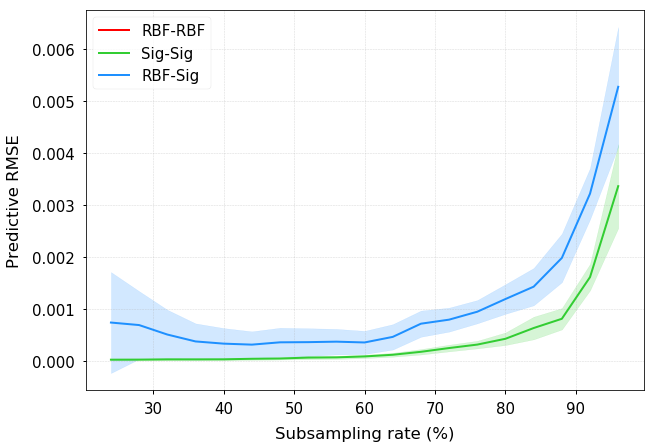

In [81]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
fig,ax = plt.subplots(1,figsize=(10,7))

labels = ['RBF-RBF', 'Sig-Sig','RBF-Sig']
colors = ['red','limegreen','dodgerblue']

for i in [0,1,2]:

    ax.plot([100-100*e/25 for e in subsample],m.iloc[i].ewm(alpha=0.1).mean().values.astype(float),color=colors[i],
            label=labels[i],marker='o',fillstyle='none',lw=2.)
    fact=1
    
    params = np.array([100-100*e/25 for e in subsample])
    plus = m.iloc[i].ewm(alpha=0.1).mean().values.astype(float)  + fact*stdv.iloc[i].ewm(alpha=0.1).mean().values.astype(float)
    minus = m.iloc[i].ewm(alpha=0.1).mean().values.astype(float) - fact*stdv.iloc[i].ewm(alpha=0.1).mean().values.astype(float).astype(float)

    ax.fill_between(params, minus,plus,alpha=0.2,color=colors[i])


ax.legend()
ax.set_ylabel(r'Predictive RMSE',labelpad=10)
#ax.yaxis.set_ticks(np.arange(0.05, 0.50, 0.05))
ax.set_xlabel(r'Subsampling rate (%)',labelpad=10)
ax.grid(alpha=0.5, linestyle='dashed', linewidth=0.5)
#plt.savefig("comparison_subsampling_phase.pdf", bbox_inches='tight', format='pdf', dpi=1000)
plt.show()